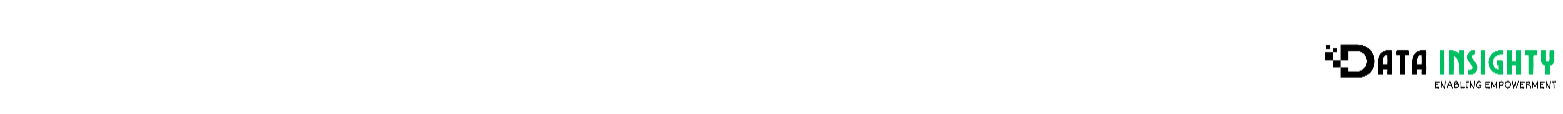

# Simple Linear Regression with TV marketing data

In this Regression example we will consider sales based on 'TV' marketing budget. 

In this notebook, we are going to build a simple linear regression model to predict 'Sales' using 'TV Marketing expense' as the independent variable.

This tutorial covers the following steps:

1. Importing libraries and loading data
2. Understanding the structure of the data
3. Performing Simple Linear Regression 
4. Evaluating Model performance 
4. Predicion using Linear Regression Model

# 1. Importing Librries and Loading data

Pandas is a powerful data manipulation and analysis library, providing data structures and functions to work with structured data.

NumPy is a fundamental package for scientific computing in Python. It provides support for multidimensional arrays and various mathematical functions to operate on these arrays.

Seaborn is a statistical data visualization library built on top of matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. pyplot is a module within Matplotlib that provides a MATLAB-like interface for plotting.

In [1]:
# Importing necessary libraries
import pandas as pd    # For data manipulation and analysis
import numpy as np     # For numerical computing
import seaborn as sns  # For statistical data visualization
import matplotlib.pyplot as plt  # For creating plots

Data set: tvmarketing.csv (kaggle.com) downloded and saved in Local machine

In [2]:
# Reading csv file from local folder
df = pd.read_csv("tvmarketing.csv")

# 2. Understanding the Data

Now, let's check the structure of the TV marketing dataset.

In [3]:
# Display the first 5 rows
df.head()

,TV marketing expenses,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [4]:
# Display the last 5 rows
df.tail()

,TV marketing expenses,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [5]:
# Let's check the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TV marketing expenses  200 non-null    float64
 1   Sales                  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [6]:
# Check the shape of the DataFrame (rows, columns)
df.shape

(200, 2)

In [7]:
# Let's look at some statistical information about the dataframe.
df.describe()

,TV marketing expenses,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


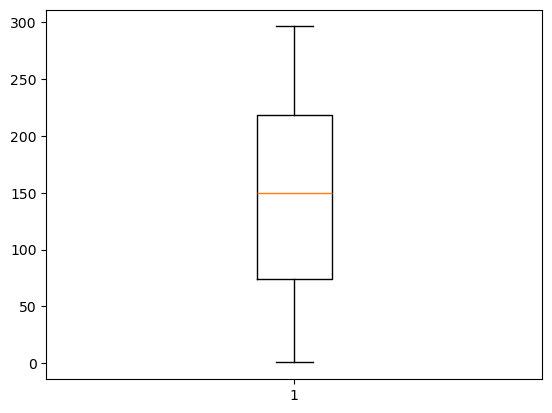

In [8]:
# Creating a box plot for TV marketing expenses
plt.boxplot(df["TV marketing expenses"])
plt.show()  # Display the plot

In [9]:
# Calculating skewness and kurtosis for TV marketing expenses
skewness = df["TV marketing expenses"].skew()  # Calculate skewness
kurtosis = df["TV marketing expenses"].kurtosis()  # Calculate kurtosis

# Printing skewness and kurtosis values
print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

Skewness: -0.06985336213274573
Kurtosis: -1.2264948242299691


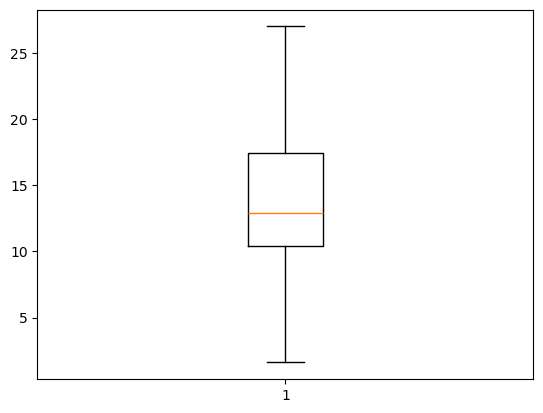

In [10]:
# Creating a box plot for Sales
plt.boxplot(df["Sales"])
plt.show()  # Display the plot

In [11]:
# Calculating skewness and kurtosis for Sales
skewness = df["Sales"].skew()  # Calculate skewness
kurtosis = df["Sales"].kurtosis()  # Calculate kurtosis

# Printing skewness and kurtosis values
print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

Skewness: 0.4075714250767127
Kurtosis: -0.40886922014994376


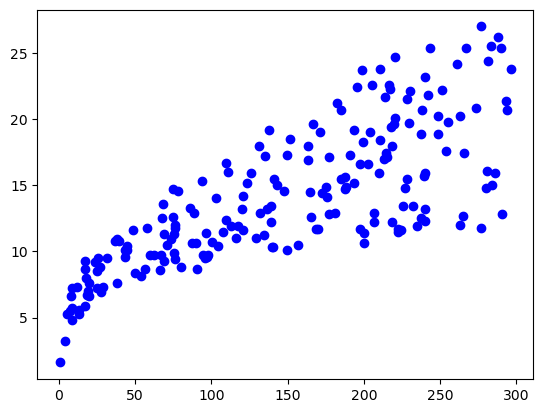

In [12]:
# Visualise the relationship between the features and the response using scatterplots
plt.scatter(df['TV marketing expenses'], df["Sales"], color='blue', label='Training Data')  # Scatter plot for training data

<Axes: >

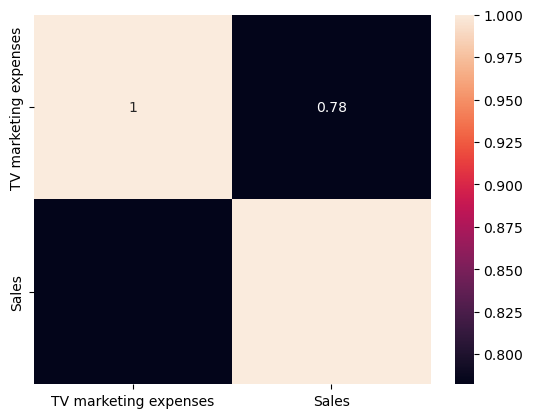

In [13]:
# Creating a heatmap of the correlation matrix for the DataFrame df
# The correlation matrix represents the correlation coefficients between different columns
# df.corr() calculates the correlation matrix for all numerical columns in the DataFrame df
# annot=True specifies that the correlation coefficients should be annotated onto the heatmap
sns.heatmap(df.corr(), annot=True)

# 3. Perfroming Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:
$y = c + m_1 \times x_1$

(Sales)  = c + m_1 x (TV Marketing expence)

The $m$ values are called the model **coefficients** or **model parameters**.

## Preparing X and y

-  The scikit-learn library expects X (feature variable) and y (response variable) to be NumPy arrays.
-  However, X can be a dataframe as Pandas is built over NumPy.

In [14]:
# Printing the column names of the DataFrame df
print(df.columns)


Index(['TV marketing expenses', 'Sales'], dtype='object')


In [15]:
# Putting feature variable to X
X = df[['TV marketing expenses']]

# Print the first 5 rows
X.head()

,TV marketing expenses
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [16]:
# Putting response variable to y
y = df['Sales']

# Print the first 5 rows
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

## Splitting Data into Training and Testing Sets

In [17]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
# X: Features (independent variables)
# y: Target (dependent variable)
# test_size: The proportion of the dataset to include in the test split
# random_state: Seed for random number generation, ensures reproducibility

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


test_size parameter determines the proportion of the dataset to include in the test split. Here, it's set to 0.3, meaning 30% of the data will be used for testing.

random_state parameter ensures reproducibility of the split. Setting it to a fixed value (42 in this case) ensures that the same random splits are generated each time the code is run, facilitating reproducibility of results.

## Performing Linear Regression

In [18]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

In [19]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

In [20]:
# Fit the model using lr.fit()
lr.fit(X_train, y_train)

LinearRegression()

## Regression equation

In [21]:
# Get coefficients and intercept
intercept = lr.intercept_
coefficients = lr.coef_

# Generate regression equation
equation = "y = {:.3f}".format(intercept)
for i, coef in enumerate(coefficients):
    equation += " + {:.3f} * X{}".format(coef, i+1)

print("Regression Equation:", equation)

Regression Equation: y = 7.239 + 0.046 * X1


Now, let's use this equation to predict our sales.

## Predictions

In [22]:
# Making predictions on the testing set
y_pred = lr.predict(X_test)

In [23]:
type(y_pred)

numpy.ndarray

In [24]:
np.shape(y_pred)

(60,)

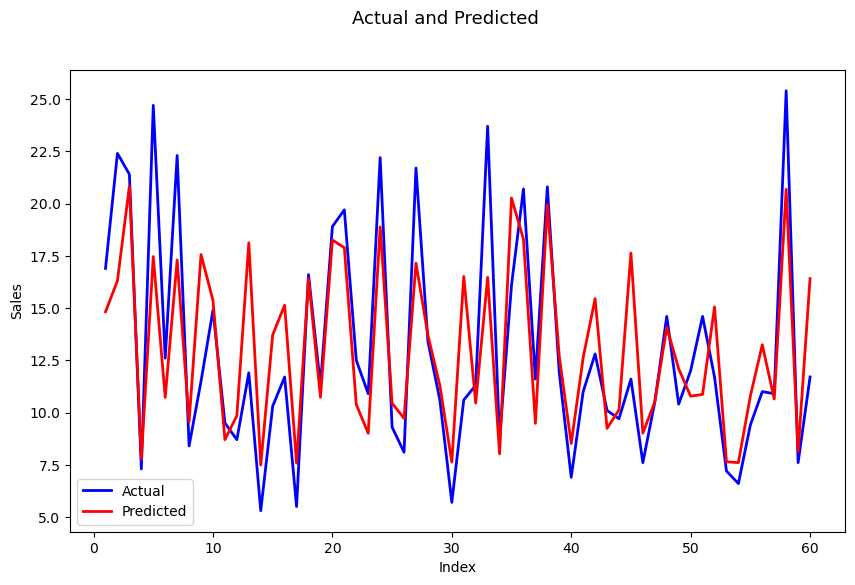

In [25]:
# Actual vs Predicted
import matplotlib.pyplot as plt

# Generating index values from 1 to 60
c = [i for i in range(1, 61, 1)]

# Create a new figure
fig = plt.figure(figsize=(10, 6))

# Plotting the actual sales values (y_test) in blue
plt.plot(c, y_test, color="blue", linewidth=2, linestyle="-", label="Actual")

# Plotting the predicted sales values (y_pred) in red
plt.plot(c, y_pred, color="red", linewidth=2, linestyle="-", label="Predicted")

# Adding a title to the plot
fig.suptitle('Actual and Predicted', fontsize=13)

# Adding labels to the x-axis and y-axis
plt.xlabel('Index', fontsize=10)
plt.ylabel('Sales', fontsize=10)

# Displaying a legend
plt.legend()

# Displaying the plot
plt.show()


## Model Evaluation

In [26]:
# Importing necessary libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

# Calculating evaluation metrics
# Assuming y_true contains the true target values and y_pred contains the predicted values

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = root_mean_squared_error(y_test, y_pred)

# R-squared (R2) Score
r2 = r2_score(y_test, y_pred)


#### Mean Absolute Error (MAE)

In [27]:
#This calculates the average absolute difference between the actual values and the predicted values.
# MAE can be useful when you're dealing with outliers that can significantly inflate MSE/RMSE.

print("Mean Absolute Error:", mae)

Mean Absolute Error: 2.2758809050205118


Mean Absolute Error (MAE) of 2.276: On average, model's predictions deviate from the actual values by 2.276 units in the data's scale. This suggests a moderate level of error, where predictions are typically within a few units of the real values.

#### Mean Squared Error (MSE)

In [28]:
#  This calculates the average squared difference between the actual values and the predicted values. 
# A lower MSE signifies a better fit because it means the predictions are, on average, closer to the actual values.

print("Mean Squared Error:", mse)

Mean Squared Error: 8.970991242413616


#### Root Mean Squared Error (RMSE)

In [29]:
#This is the square root of the MSE. RMSE is easier to interpret in the original units of your data compared to MSE. 
#Similar to MSE, a lower RMSE indicates a better model.
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 2.995161304907236



Root Mean Squared Error (RMSE) of 2.995: This reinforces the MAE finding. The average squared difference between predictions and actual values is 2.995**2, which translates to an average deviation of 2.995 units. RMSE emphasizes larger errors more than MAE, but the values here are still relatively close.

#### R-squared (R²) - Strength of Association 

In [30]:
# This metric represents the proportion of variance in the dependent variable (what you're trying to predict) explained by the independent variables (features used for prediction).
# It ranges from 0 to 1, with a higher value indicating a better fit.

print("R-squared:", r2)

R-squared: 0.6714477229302764


R-squared of 0.671: This metric indicates that the model explains 67.1% of the variance in the dependent variable you're trying to predict. In other words, 67.1% of the changes in the dependent variable can be attributed to the independent variables included in your model.

#### Residual plots

Plotting the residuals (difference between actual and predicted values) versus the predicted values can reveal patterns like non-linearity or heteroscedasticity (unequal variance) that might require further adjustments to the model.

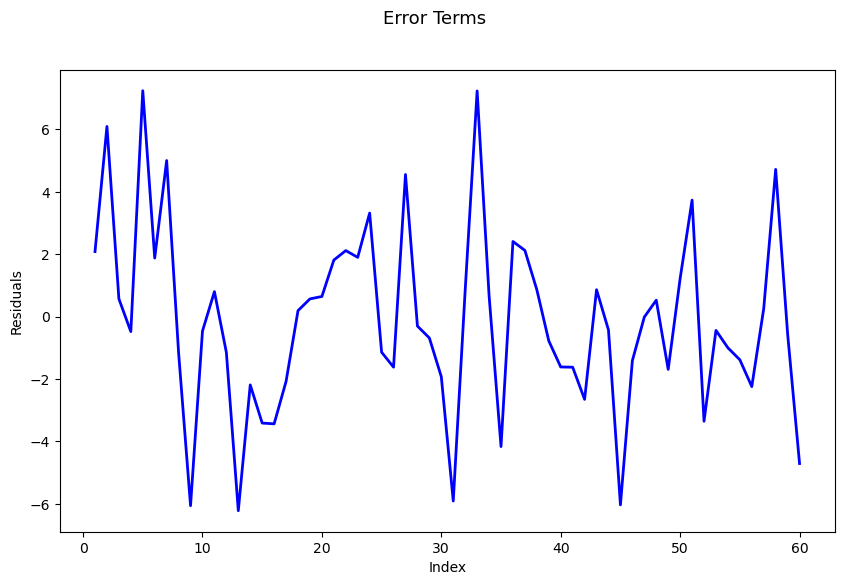

In [31]:
# Error terms
residuals = y_test - y_pred  # Calculate residuals (difference between true and predicted values)
c = [i for i in range(1, 61, 1)]  # Generating index

# Create a new figure with specified size (e.g., width=10 inches, height=6 inches)
fig = plt.figure(figsize=(10, 6))

# Plotting the residuals
plt.plot(c, residuals, color="blue", linewidth=2, linestyle="-")

# Adding a title to the plot
fig.suptitle('Error Terms', fontsize=13)

# Adding labels to the x-axis and y-axis
plt.xlabel('Index', fontsize=10)
plt.ylabel('Residuals', fontsize=10)

# Displaying the plot
plt.show()


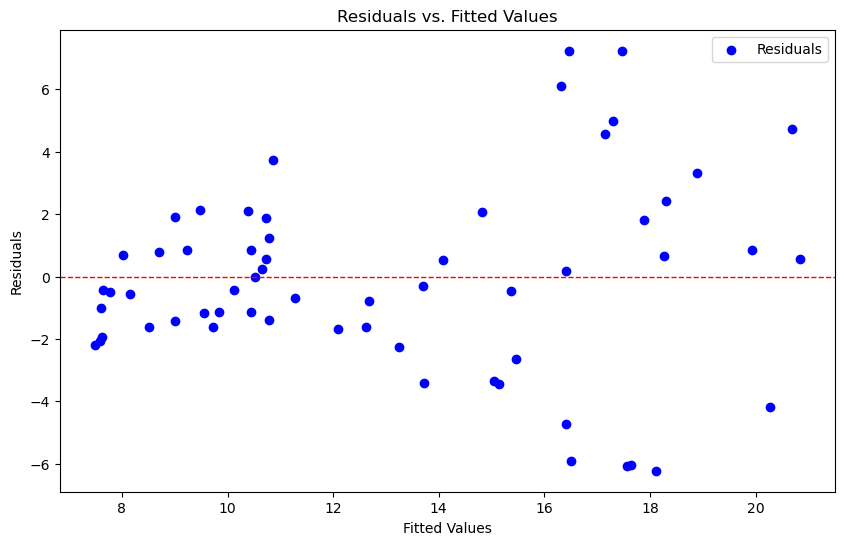

In [32]:
# Create a figure with specified size
plt.figure(figsize=(10, 6))

# Scatter plot of residuals vs. fitted values with different colors
plt.scatter(y_pred, residuals, color='blue', label='Residuals')

# Add reference line at y=0
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)

# Set title, x-label, and y-label
plt.title("Residuals vs. Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")

# Add legend
plt.legend()

# Display the plot
plt.show()

These results suggest that your linear regression model has a moderately good fit to the data. The model can capture a significant portion of the relationship between the independent and dependent variables, with predictions being reasonably close to actual values on average.

## Predicting new data using Linear Regerssion Model

In [33]:
# Creating a new DataFrame 'X_new' with TV marketing expenses data
X_new = pd.DataFrame({'TV marketing expenses': [300, 350, 400]})

In [34]:
# Predict using the trained model
predictions = lr.predict(X_new)

In [35]:
# Print predictions for each row in X_new
for i, pred in enumerate(predictions):
    print(f"Prediction for X_new[{i}]: {pred}")

Prediction for X_new[0]: 21.16180046919696
Prediction for X_new[1]: 23.482190575604598
Prediction for X_new[2]: 25.802580682012234


However, there's also room for improvement. Here's what to consider:

Domain Knowledge: Think about the scale of your data and the real-world implications of these errors. A 2 unit error might be acceptable in one situation but unacceptable in another.


Alternative Metrics: Depending on your application, you might consider using other evaluation metrics alongside these. For instance, Mean Squared Error (MSE) might be useful if larger errors are particularly concerning.


Model Improvement: Explore ways to potentially improve the model's fit. This could involve:

Including additional relevant features

Addressing outliers in your data

Trying different model types (e.g., polynomial regression for non-linear relationships)

Tuning hyperparameters of the linear regression model

By carefully considering these factors and potentially refining your model, you can strive for a better fit and more accurate predictions.

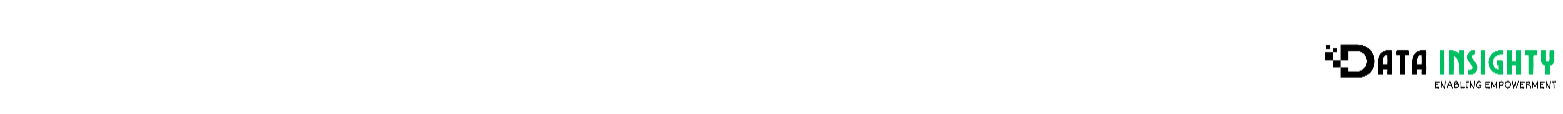